<a href="https://colab.research.google.com/github/aliyanshaikh7/CAD_PCG_Detection/blob/main/CAD_PCG_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -q librosa

Import Libraries & Setup Paths

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import librosa
import librosa.display

# project paths
PROJECT_ROOT = '/content/drive/MyDrive/CAD_PCG_Detection'
DATA_FOLDER = f'{PROJECT_ROOT}/CAD_PCG_Dataset'

print(f'Project root: {PROJECT_ROOT}')
print(f'Data folder: {DATA_FOLDER}')

Project root: /content/drive/MyDrive/CAD_PCG_Detection
Data folder: /content/drive/MyDrive/CAD_PCG_Detection/CAD_PCG_Dataset


Extracting training and validation zip files

In [4]:
import zipfile

training_zip = f'{DATA_FOLDER}/training.zip'
if os.path.exists(training_zip):
  print("Extracting training.zip")
  with zipfile.ZipFile(training_zip, 'r') as zip_ref:
      zip_ref.extractall(DATA_FOLDER)
  os.remove(training_zip)

  print("Training data extracted and zip removed\n")
else:
  print("training.zip not found / already extracted")

validation_zip = f'{DATA_FOLDER}/validation.zip'
if os.path.exists(validation_zip):
  print("Extracting validation.zip")

  with zipfile.ZipFile(validation_zip, 'r') as zip_ref:
      zip_ref.extractall(DATA_FOLDER)
  os.remove(validation_zip)

  print("Validation data extracted and zip removed")
else:
  print("validation.zip not found / already extracted\n")

print("Extraction done")

training.zip not found / already extracted
validation.zip not found / already extracted

Extraction done


Inspecting the number of .wav files in the training datasets


In [5]:

print("CAD_PCG_Dataset folders:")
for item in sorted(os.listdir(DATA_FOLDER)):
    item_path = os.path.join(DATA_FOLDER, item)
    if os.path.isdir(item_path):
        wav_count = len([f for f in os.listdir(item_path) if f.endswith('.wav')])
        print(f"  • {item}: {wav_count} .wav files")

CAD_PCG_Dataset folders:
  • training-a: 409 .wav files
  • training-b: 490 .wav files
  • training-b-e-augmented: 1435 .wav files
  • training-b-e-combined: 2631 .wav files
  • training-c: 31 .wav files
  • training-d: 55 .wav files
  • training-e: 2141 .wav files
  • training-f: 114 .wav files
  • validation: 301 .wav files


Inspecting class balance in training sets B and E (CAD related data)

In [6]:
print("Training-B:")
df_b = pd.read_csv(f'{DATA_FOLDER}/training-b/REFERENCE.csv', header=None, names=['filename', 'label'])

print(f"   Total: {len(df_b)}")
print(f"   Normal: {(df_b['label'] == -1).sum()} ({(df_b['label'] == -1).sum()/len(df_b)*100:.1f}%)")
print(f"   Abnormal: {(df_b['label'] == 1).sum()} ({(df_b['label'] == 1).sum()/len(df_b)*100:.1f}%)\n")


print("Training-E:")
df_e = pd.read_csv(f'{DATA_FOLDER}/training-e/REFERENCE.csv', header=None, names=['filename', 'label'])

print(f"   Total: {len(df_e)}")
print(f"   Normal: {(df_e['label'] == -1).sum()} ({(df_e['label'] == -1).sum()/len(df_e)*100:.1f}%)")
print(f"   Abnormal: {(df_e['label'] == 1).sum()} ({(df_e['label'] == 1).sum()/len(df_e)*100:.1f}%)\n")

print("Combined B + E:")
df_combined = pd.concat([df_b, df_e])

print(f"   Total: {len(df_combined)}")
print(f"   Normal: {(df_combined['label'] == -1).sum()} ({(df_combined['label'] == -1).sum()/len(df_combined)*100:.1f}%)")
print(f"   Abnormal: {(df_combined['label'] == 1).sum()} ({(df_combined['label'] == 1).sum()/len(df_combined)*100:.1f}%)")



Training-B:
   Total: 490
   Normal: 386 (78.8%)
   Abnormal: 104 (21.2%)

Training-E:
   Total: 2141
   Normal: 1958 (91.5%)
   Abnormal: 183 (8.5%)

Combined B + E:
   Total: 2631
   Normal: 2344 (89.1%)
   Abnormal: 287 (10.9%)


Visualise normal vs abnormal heart beat

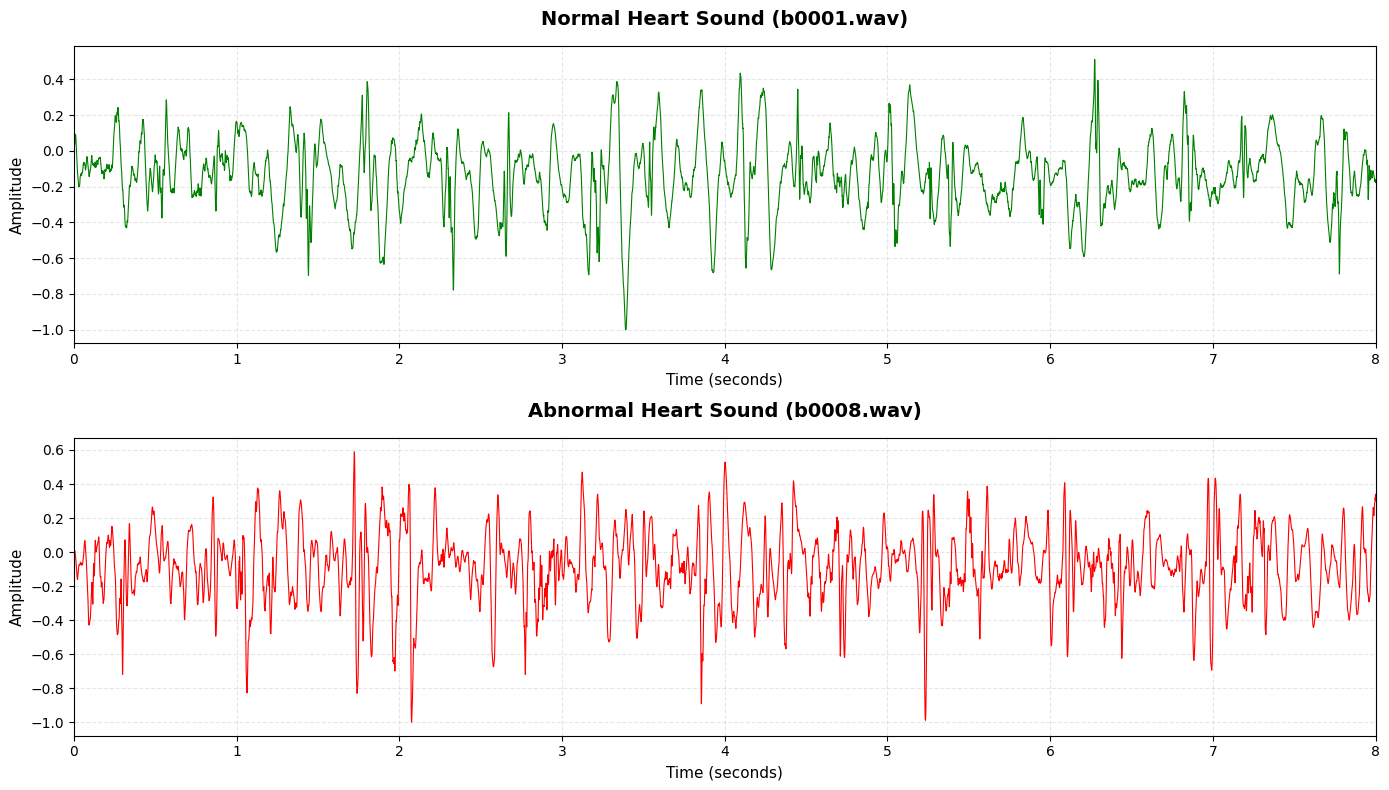


 Audio Statistics:

Normal (b0001.wav):
  • Duration: 8.00 seconds
  • Sample Rate: 2000 Hz
  • Samples: 16000
  • Amplitude Range: [-1.0000, 0.5113]

Abnormal (b0008.wav):
  • Duration: 8.00 seconds
  • Sample Rate: 2000 Hz
  • Samples: 16000
  • Amplitude Range: [-1.0000, 0.5891]


In [7]:

normal_path = f'{DATA_FOLDER}/training-b/b0001.wav'
normal_audio, sr = librosa.load(normal_path, sr=2000)

abnormal_path = f'{DATA_FOLDER}/training-b/b0008.wav'
abnormal_audio, sr = librosa.load(abnormal_path, sr=2000)

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# plot normal heart sound
axes[0].plot(np.arange(len(normal_audio)) / sr, normal_audio, color='green', linewidth=0.8)

axes[0].set_title('Normal Heart Sound (b0001.wav)', fontsize=14, fontweight='bold', pad=15)
axes[0].set_xlabel('Time (seconds)', fontsize=11)
axes[0].set_ylabel('Amplitude', fontsize=11)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].set_xlim(0, len(normal_audio) / sr)

# plot abnormal heart sound
axes[1].plot(np.arange(len(abnormal_audio)) / sr, abnormal_audio, color='red', linewidth=0.8)
axes[1].set_title('Abnormal Heart Sound (b0008.wav)', fontsize=14, fontweight='bold', pad=15)
axes[1].set_xlabel('Time (seconds)', fontsize=11)
axes[1].set_ylabel('Amplitude', fontsize=11)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].set_xlim(0, len(abnormal_audio) / sr)

plt.tight_layout()
plt.show()

# print audio statistics
print(f"\n Audio Statistics:")
print(f"\nNormal (b0001.wav):")
print(f"  • Duration: {len(normal_audio) / sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(normal_audio)}")
print(f"  • Amplitude Range: [{normal_audio.min():.4f}, {normal_audio.max():.4f}]")

print(f"\nAbnormal (b0008.wav):")
print(f"  • Duration: {len(abnormal_audio) / sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(abnormal_audio)}")
print(f"  • Amplitude Range: [{abnormal_audio.min():.4f}, {abnormal_audio.max():.4f}]")

Defining audio augmentation functions such as time stretch, pitch stretch and adding noise to audio; in order to create variations of abnormal class samples

In [8]:
def time_stretch_audio(audio, rate):
  """
  Speed up or slow down audio

  Args:
    audio: numpy array - the input audio waveform
    rate: float - speed multiplier
      - rate > 1.0 - audio plays FASTER (compressed)
      - rate < 1.0 - audio plays SLOWER (stretched)
      - rate = 1.0 - audio plays with NORMAL SPEED
      - Example: rate=1.1 means audio will play 10% faster, rate=0.9 means audio will play 10% slower

  Returns:
    numpy array - time-streched audio waveform

  """
  return librosa.effects.time_stretch(y=audio, rate=rate)

def pitch_stretch_audio(audio, sr, n_steps):
  """
  Shift pitch up or down

  Args:
    audio: numpy array - the input audio waveform
    sr: int - sample rate (Hz)
    n_steps: int - number of semitones to shift pitch by
      - n_steps > 0 - shift pitch UP (higher frequency)
      - n_steps < 0 - shift pitch DOWN (lower frequency)
      - n_steps = 0 - no pitch shift
      - Example: n_steps=2 shifts up 2 semitones, n_steps=-2 shifts down 2 semitones

  Returns:
    numpy array - pitch-shifted audio waveform

  """
  return librosa.effects.pitch_shift(y=audio, sr=sr, n_steps=n_steps)

def add_noise_audio(audio, noise_factor):
  """
  Add noise to audio

  Args:
        audio: numpy array - the input audio waveform
        noise_factor: float - amount of noise to add (standard deviation)
                      - 0.005 = 0.5% noise (subtle)
                      - 0.01 = 1% noise (moderate)
                      - Higher values = more noise (fuzzier sound)
                      - Lower values = less noise (cleaner sound)

    Returns:
        numpy array - audio with added Gaussian noise
  """
  noise = np.random.randn(len(audio))
  return audio + noise_factor * noise


Augmentating the original audio to be 10% faster

TIME STRETCH FAST (rate=1.1)


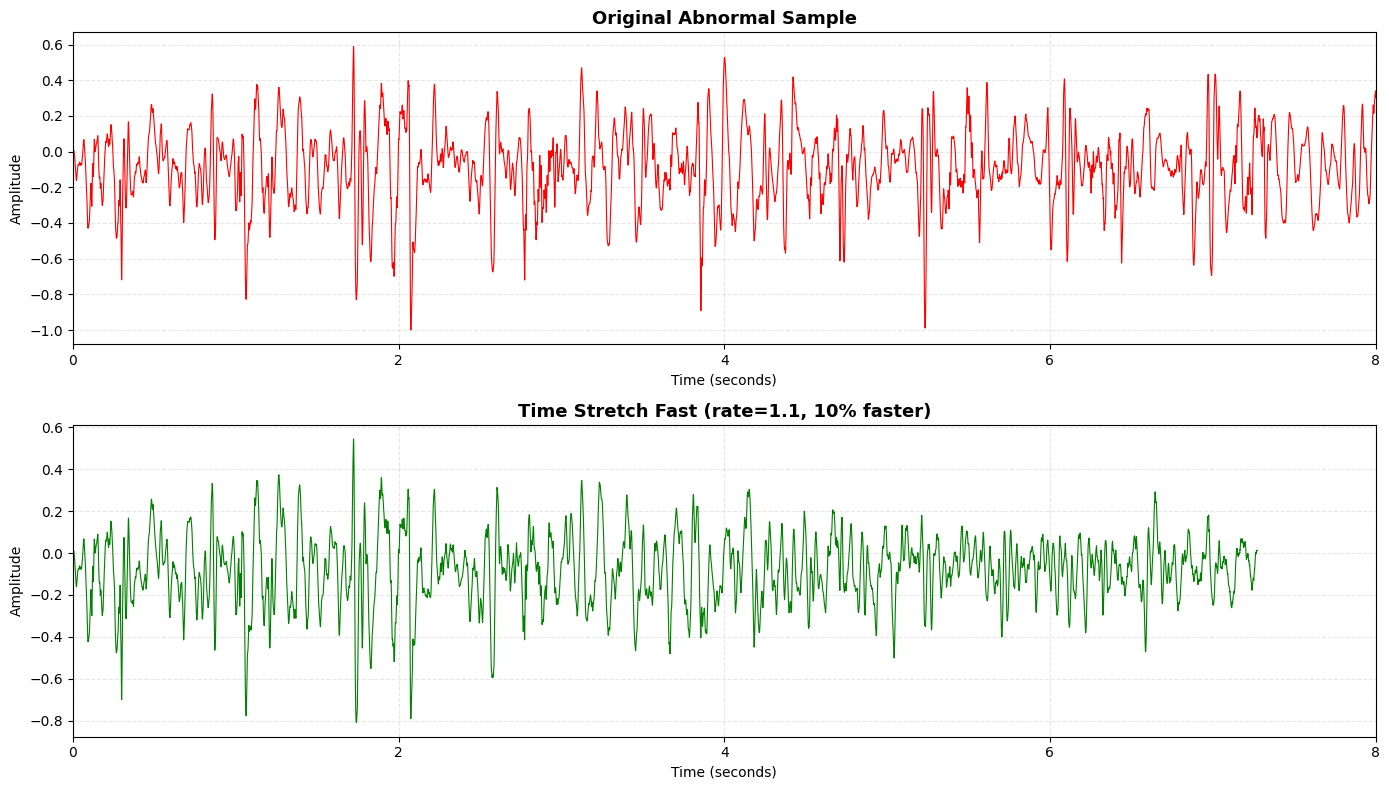


Audio Statistics:

Original (b0008.wav):
  • Duration: 8.00 seconds
  • Sample Rate: 2000 Hz
  • Samples: 16000
  • Amplitude Range: [-1.0000, 0.5891]

Time Stretched Fast (rate=1.1):
  • Duration: 7.27 seconds
  • Sample Rate: 2000 Hz
  • Samples: 14545
  • Amplitude Range: [-0.8080, 0.5434]

As we notice, the duration of the augmentated audio is shorter and the number of samples has also reduced


In [9]:


print("=" * 70)
print("TIME STRETCH FAST (rate=1.1)")
print("=" * 70)

original = abnormal_audio

aug_time_fast = time_stretch_audio(original, rate=1.1)

time_original = np.arange(len(original)) / sr
time_fast = np.arange(len(aug_time_fast)) / sr

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Plot 1: Original
axes[0].plot(time_original, original, color='red', linewidth=0.8)
axes[0].set_title('Original Abnormal Sample', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Time (seconds)', fontsize=10)
axes[0].set_ylabel('Amplitude', fontsize=10)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].set_xlim(0, 8)
axes[0].set_xticks([0, 2, 4, 6, 8])

# Plot 2: Time Stretch Fast
axes[1].plot(time_fast, aug_time_fast, color='green', linewidth=0.8)
axes[1].set_title('Time Stretch Fast (rate=1.1, 10% faster)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Time (seconds)', fontsize=10)
axes[1].set_ylabel('Amplitude', fontsize=10)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].set_xlim(0, 8)
axes[1].set_xticks([0, 2, 4, 6, 8])

plt.tight_layout()
plt.show()


print("\nAudio Statistics:")

print(f"\nOriginal (b0008.wav):")
print(f"  • Duration: {len(original)/sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(original)}")
print(f"  • Amplitude Range: [{original.min():.4f}, {original.max():.4f}]")

print(f"\nTime Stretched Fast (rate=1.1):")
print(f"  • Duration: {len(aug_time_fast)/sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(aug_time_fast)}")
print(f"  • Amplitude Range: [{aug_time_fast.min():.4f}, {aug_time_fast.max():.4f}]")

print("\nAs we notice, the duration of the augmentated audio is shorter and the number of samples has also reduced")

Augmentating the original audio to be 10% slower

TIME STRETCH SLOW (rate=0.9)


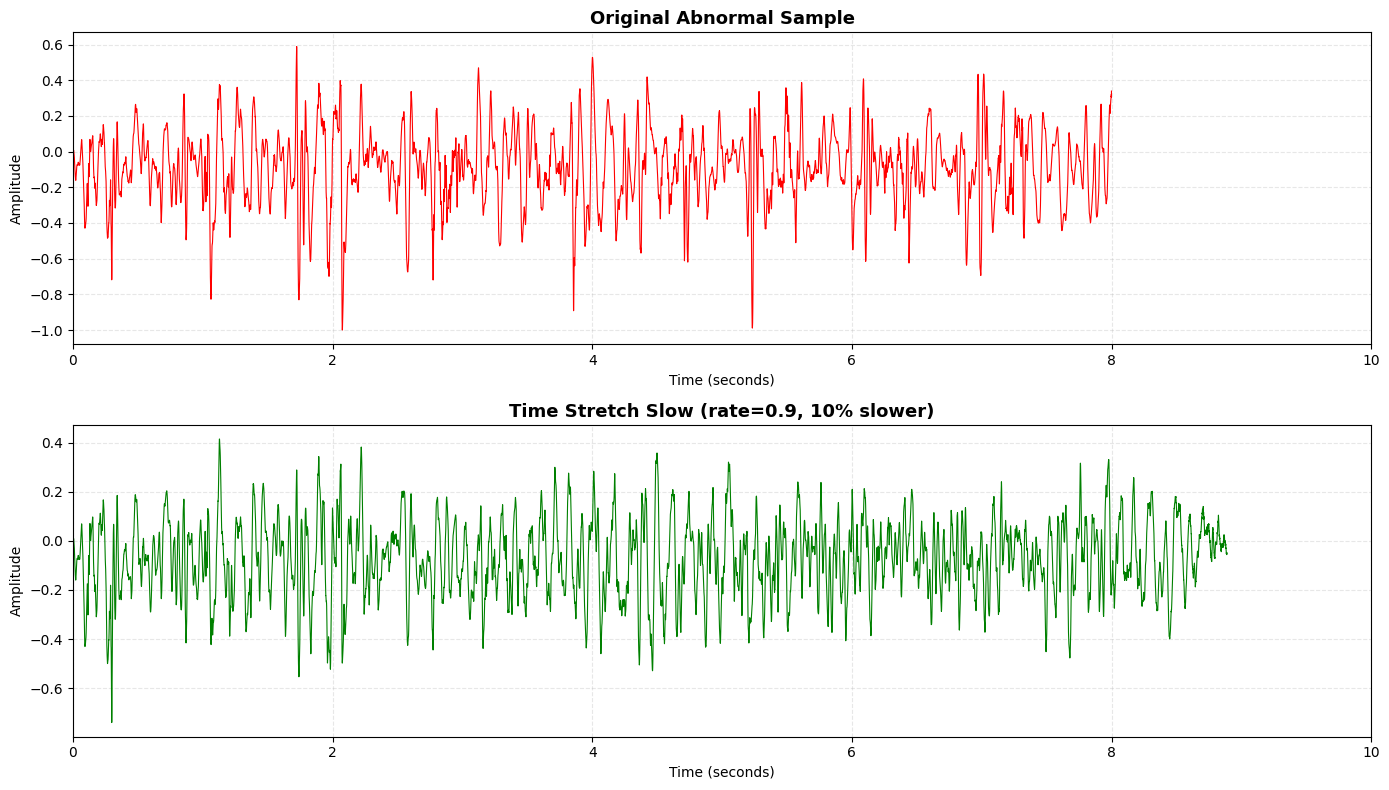


Audio Statistics:

Original (b0008.wav):
  • Duration: 8.00 seconds
  • Sample Rate: 2000 Hz
  • Samples: 16000
  • Amplitude Range: [-1.0000, 0.5891]

Time Stretched Slow (rate=0.9):
  • Duration: 8.89 seconds
  • Sample Rate: 2000 Hz
  • Samples: 17778
  • Amplitude Range: [-0.7401, 0.4144]

As we notice, the duration of the augmentated audio is longer and the number of samples has also increased


In [10]:

print("=" * 70)
print("TIME STRETCH SLOW (rate=0.9)")
print("=" * 70)

original = abnormal_audio

# Apply time stretch slow
aug_time_slow = time_stretch_audio(original, rate=0.9)

# Create time axes
time_original = np.arange(len(original)) / sr
time_slow = np.arange(len(aug_time_slow)) / sr

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Plot 1: Original
axes[0].plot(time_original, original, color='red', linewidth=0.8)
axes[0].set_title('Original Abnormal Sample', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Time (seconds)', fontsize=10)
axes[0].set_ylabel('Amplitude', fontsize=10)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].set_xlim(0, 10)  # Extended to 10s to show the longer slow version
axes[0].set_xticks([0, 2, 4, 6, 8, 10])

# Plot 2: Time Stretch Slow
axes[1].plot(time_slow, aug_time_slow, color='green', linewidth=0.8)
axes[1].set_title('Time Stretch Slow (rate=0.9, 10% slower)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Time (seconds)', fontsize=10)
axes[1].set_ylabel('Amplitude', fontsize=10)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].set_xlim(0, 10)  # Extended to 10s to show full slow version
axes[1].set_xticks([0, 2, 4, 6, 8, 10])

plt.tight_layout()
plt.show()

# Print statistics
print(f"\nAudio Statistics:")

print(f"\nOriginal (b0008.wav):")
print(f"  • Duration: {len(original)/sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(original)}")
print(f"  • Amplitude Range: [{original.min():.4f}, {original.max():.4f}]")

print(f"\nTime Stretched Slow (rate=0.9):")
print(f"  • Duration: {len(aug_time_slow)/sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(aug_time_slow)}")
print(f"  • Amplitude Range: [{aug_time_slow.min():.4f}, {aug_time_slow.max():.4f}]")

print("\nAs we notice, the duration of the augmentated audio is longer and the number of samples has also increased")


Augmenting the audio to shift up in pitch by 2 semitones

PITCH SHIFT UP (n_steps=+2)


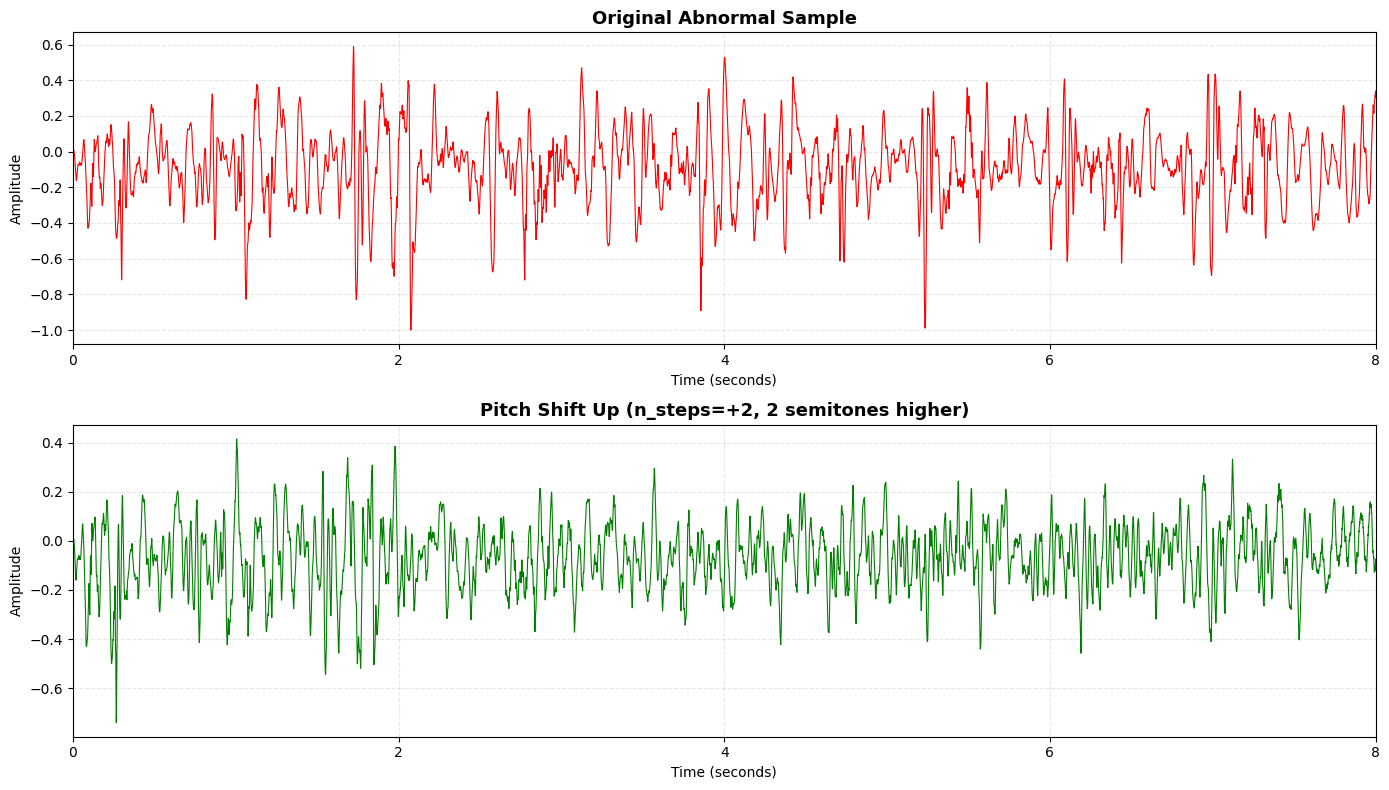


 Audio Statistics:

Original (b0008.wav):
  • Duration: 8.00 seconds
  • Sample Rate: 2000 Hz
  • Samples: 16000
  • Amplitude Range: [-1.0000, 0.5891]

Pitch Shifted Up (n_steps=+2):
  • Duration: 8.00 seconds
  • Sample Rate: 2000 Hz
  • Samples: 16000
  • Amplitude Range: [-0.7401, 0.4150]


In [11]:
# Testing Pitch Shift UP

print("=" * 70)
print("PITCH SHIFT UP (n_steps=+2)")
print("=" * 70)

original = abnormal_audio

# Apply pitch shift up
aug_pitch_up = pitch_stretch_audio(original, sr, n_steps=2)

# Create time axes
time_original = np.arange(len(original)) / sr
time_pitch_up = np.arange(len(aug_pitch_up)) / sr


fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Plot 1: Original
axes[0].plot(time_original, original, color='red', linewidth=0.8)
axes[0].set_title('Original Abnormal Sample', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Time (seconds)', fontsize=10)
axes[0].set_ylabel('Amplitude', fontsize=10)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].set_xlim(0, 8)
axes[0].set_xticks([0, 2, 4, 6, 8])

# Plot 2: Pitch Shift Up
axes[1].plot(time_pitch_up, aug_pitch_up, color='green', linewidth=0.8)
axes[1].set_title('Pitch Shift Up (n_steps=+2, 2 semitones higher)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Time (seconds)', fontsize=10)
axes[1].set_ylabel('Amplitude', fontsize=10)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].set_xlim(0, 8)
axes[1].set_xticks([0, 2, 4, 6, 8])

plt.tight_layout()
plt.show()

# Print statistics
print(f"\n Audio Statistics:")

print(f"\nOriginal (b0008.wav):")
print(f"  • Duration: {len(original)/sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(original)}")
print(f"  • Amplitude Range: [{original.min():.4f}, {original.max():.4f}]")

print(f"\nPitch Shifted Up (n_steps=+2):")
print(f"  • Duration: {len(aug_pitch_up)/sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(aug_pitch_up)}")
print(f"  • Amplitude Range: [{aug_pitch_up.min():.4f}, {aug_pitch_up.max():.4f}]")

## Spectral Centroid Analysis

As it is not visually evident that the frequency of the augmented sound has changed, we can quantify the change in frequency by using spectral centroid analysis.

### What is Spectral Centroid?

* The "center of mass" of the frequency spectrum - the weighted average frequency
* Formula: `Σ(frequency × magnitude) / Σ(magnitude)`
* Higher centroid = "brighter" sound (more high-frequency content)
* Lower centroid = "darker" sound (more low-frequency content)

### Expected for ±2 Semitone Shift

* Centroid should change by approximately **10-15%** in the direction of the pitch shift

In [12]:


centroid_original = librosa.feature.spectral_centroid(y=original, sr=sr)

centroid_pitch_up = librosa.feature.spectral_centroid(y=aug_pitch_up, sr=sr)

# Take mean across time
mean_centroid_original = np.mean(centroid_original)
mean_centroid_pitch_up = np.mean(centroid_pitch_up)

print(f"\n Spectral Centroid Analysis:")
print(f"  • Original spectral centroid: {mean_centroid_original:.2f} Hz")
print(f"  • Pitch shifted spectral centroid: {mean_centroid_pitch_up:.2f} Hz")
print(f"  • Frequency shift: {mean_centroid_pitch_up - mean_centroid_original:.2f} Hz")
print(f"  • Percentage increase: {((mean_centroid_pitch_up/mean_centroid_original - 1) * 100):.1f}%")


 Spectral Centroid Analysis:
  • Original spectral centroid: 38.09 Hz
  • Pitch shifted spectral centroid: 42.46 Hz
  • Frequency shift: 4.37 Hz
  • Percentage increase: 11.5%


Augmenting the audio to shift down in pitch by 2 semitones

PITCH SHIFT DOWN (n_steps=-2)


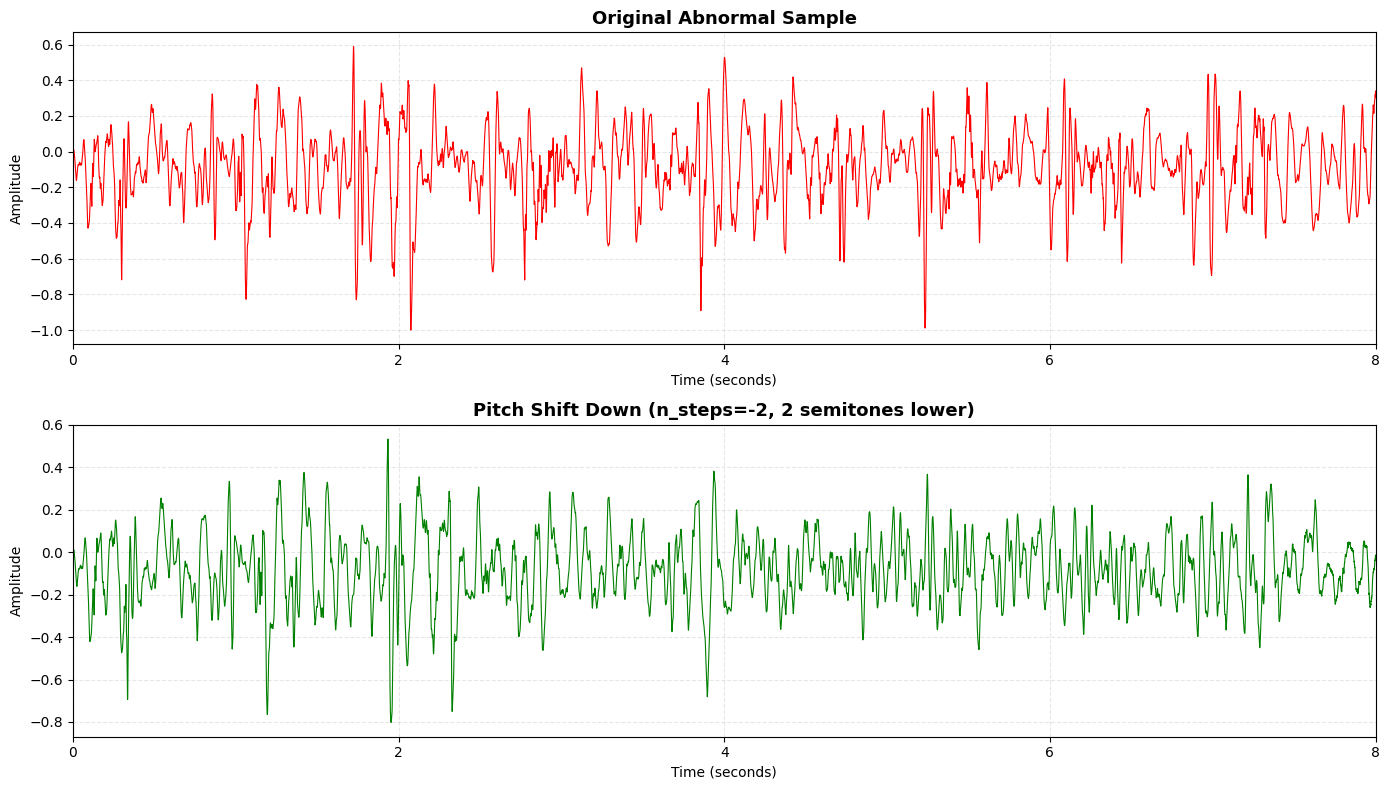


Audio Statistics:

Original (b0008.wav):
  • Duration: 8.00 seconds
  • Sample Rate: 2000 Hz
  • Samples: 16000
  • Amplitude Range: [-1.0000, 0.5891]

Pitch Shifted Down (n_steps=-2):
  • Duration: 8.00 seconds
  • Sample Rate: 2000 Hz
  • Samples: 16000
  • Amplitude Range: [-0.8028, 0.5332]


In [13]:


print("=" * 70)
print("PITCH SHIFT DOWN (n_steps=-2)")
print("=" * 70)

original = abnormal_audio

aug_pitch_down = pitch_stretch_audio(original, sr, n_steps=-2)

# Create time axes
time_original = np.arange(len(original)) / sr
time_pitch_down = np.arange(len(aug_pitch_down)) / sr

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Plot 1: Original
axes[0].plot(time_original, original, color='red', linewidth=0.8)
axes[0].set_title('Original Abnormal Sample', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Time (seconds)', fontsize=10)
axes[0].set_ylabel('Amplitude', fontsize=10)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].set_xlim(0, 8)
axes[0].set_xticks([0, 2, 4, 6, 8])

# Plot 2: Pitch Shift Down
axes[1].plot(time_pitch_down, aug_pitch_down, color='green', linewidth=0.8)
axes[1].set_title('Pitch Shift Down (n_steps=-2, 2 semitones lower)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Time (seconds)', fontsize=10)
axes[1].set_ylabel('Amplitude', fontsize=10)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].set_xlim(0, 8)
axes[1].set_xticks([0, 2, 4, 6, 8])

plt.tight_layout()
plt.show()

# Print statistics
print(f"\nAudio Statistics:")

print(f"\nOriginal (b0008.wav):")
print(f"  • Duration: {len(original)/sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(original)}")
print(f"  • Amplitude Range: [{original.min():.4f}, {original.max():.4f}]")

print(f"\nPitch Shifted Down (n_steps=-2):")
print(f"  • Duration: {len(aug_pitch_down)/sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(aug_pitch_down)}")
print(f"  • Amplitude Range: [{aug_pitch_down.min():.4f}, {aug_pitch_down.max():.4f}]")


In [14]:
centroid_original = librosa.feature.spectral_centroid(y=original, sr=sr)
centroid_pitch_down = librosa.feature.spectral_centroid(y=aug_pitch_down, sr=sr)

mean_centroid_original = np.mean(centroid_original)
mean_centroid_pitch_down = np.mean(centroid_pitch_down)

print(f"\n Spectral Centroid Analysis:")
print(f"  • Original spectral centroid: {mean_centroid_original:.2f} Hz")
print(f"  • Pitch shifted down spectral centroid: {mean_centroid_pitch_down:.2f} Hz")
print(f"  • Frequency shift: {mean_centroid_pitch_down - mean_centroid_original:.2f} Hz")
print(f"  • Percentage decrease: {((mean_centroid_pitch_down/mean_centroid_original - 1) * 100):.1f}%")


 Spectral Centroid Analysis:
  • Original spectral centroid: 38.09 Hz
  • Pitch shifted down spectral centroid: 31.25 Hz
  • Frequency shift: -6.84 Hz
  • Percentage decrease: -18.0%


For clearer visibility we can capture the first 2 seconds rather than all 8 seconds

ZOOMED COMPARISON: PITCH SHIFT VISUALIZATION


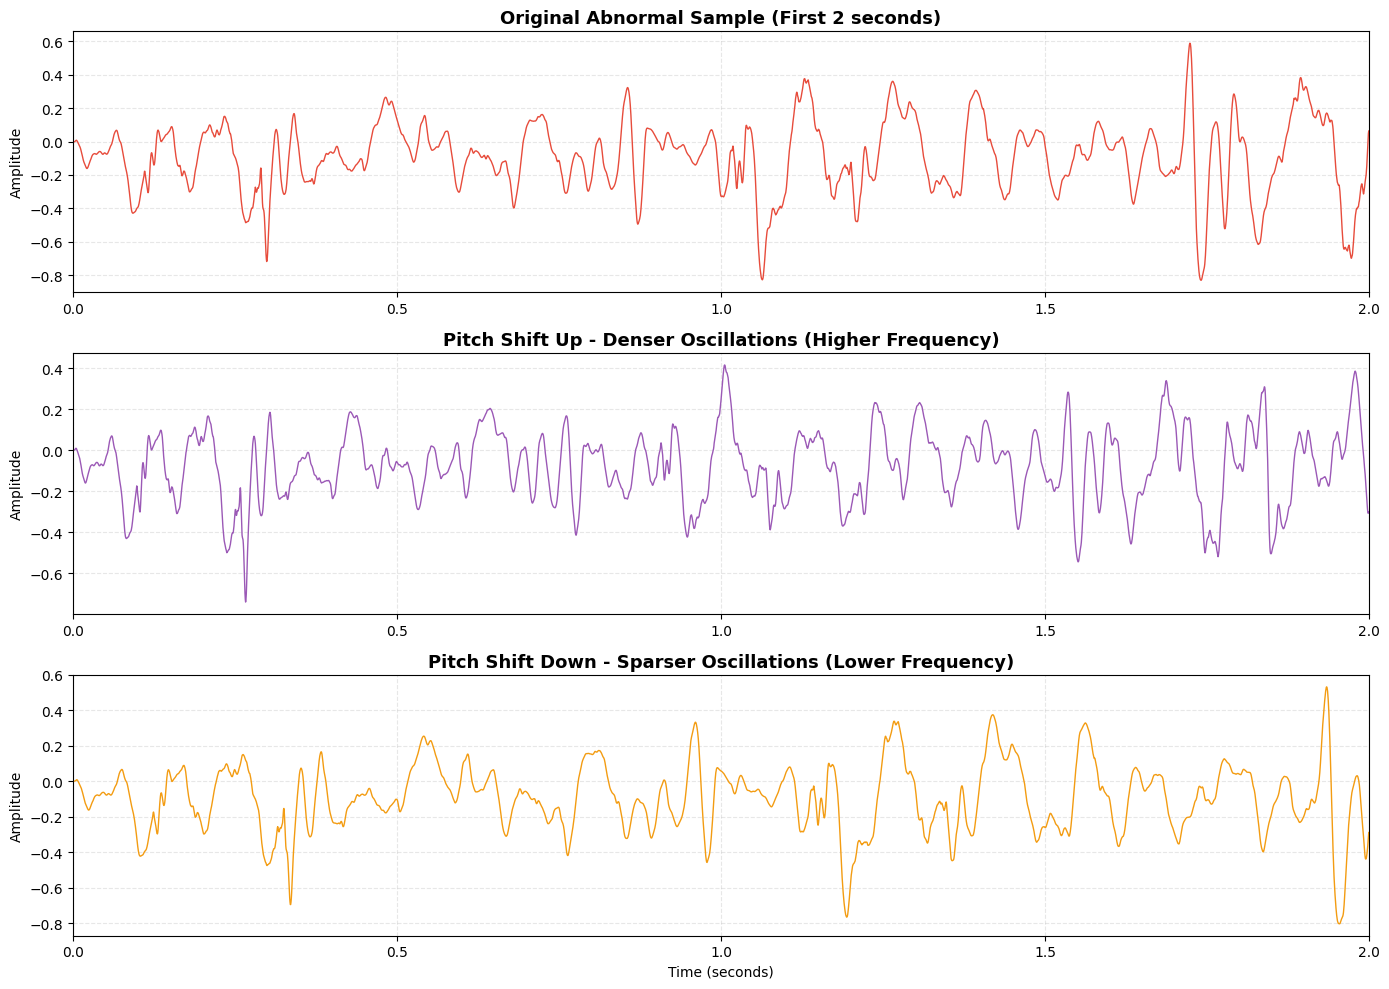


 Visual Observation:
  • Original: Baseline oscillation pattern
  • Pitch Up: More waves packed into same time (denser/tighter)
  • Pitch Down: Fewer waves in same time (sparser/wider)
  • All three maintain same heartbeat timing and structure


In [15]:

print("=" * 70)
print("ZOOMED COMPARISON: PITCH SHIFT VISUALIZATION")
print("=" * 70)

# use 2-second window for detailed view
zoom_duration = 2
zoom_samples = zoom_duration * sr

# extract zoomed portions
original_zoom = original[:zoom_samples]
pitch_up_zoom = aug_pitch_up[:zoom_samples]
pitch_down_zoom = aug_pitch_down[:zoom_samples]

# create time axis
time_zoom = np.arange(zoom_samples) / sr

fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# Plot 1: Original
axes[0].plot(time_zoom, original_zoom, color='#e74c3c', linewidth=1.0)
axes[0].set_title('Original Abnormal Sample (First 2 seconds)', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Amplitude', fontsize=10)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].set_xlim(0, zoom_duration)
axes[0].set_xticks([0, 0.5, 1.0, 1.5, 2.0])

# Plot 2: Pitch Up
axes[1].plot(time_zoom, pitch_up_zoom, color='#9b59b6', linewidth=1.0)
axes[1].set_title('Pitch Shift Up - Denser Oscillations (Higher Frequency)', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Amplitude', fontsize=10)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].set_xlim(0, zoom_duration)
axes[1].set_xticks([0, 0.5, 1.0, 1.5, 2.0])

# Plot 3: Pitch Down
axes[2].plot(time_zoom, pitch_down_zoom, color='#f39c12', linewidth=1.0)
axes[2].set_title('Pitch Shift Down - Sparser Oscillations (Lower Frequency)', fontsize=13, fontweight='bold')
axes[2].set_xlabel('Time (seconds)', fontsize=10)
axes[2].set_ylabel('Amplitude', fontsize=10)
axes[2].grid(True, alpha=0.3, linestyle='--')
axes[2].set_xlim(0, zoom_duration)
axes[2].set_xticks([0, 0.5, 1.0, 1.5, 2.0])

plt.tight_layout()
plt.show()

print(f"\n Visual Observation:")
print(f"  • Original: Baseline oscillation pattern")
print(f"  • Pitch Up: More waves packed into same time (denser/tighter)")
print(f"  • Pitch Down: Fewer waves in same time (sparser/wider)")
print(f"  • All three maintain same heartbeat timing and structure")

Augmenting the audio to have Gaussian noise

GAUSSIAN NOISE ADDITION


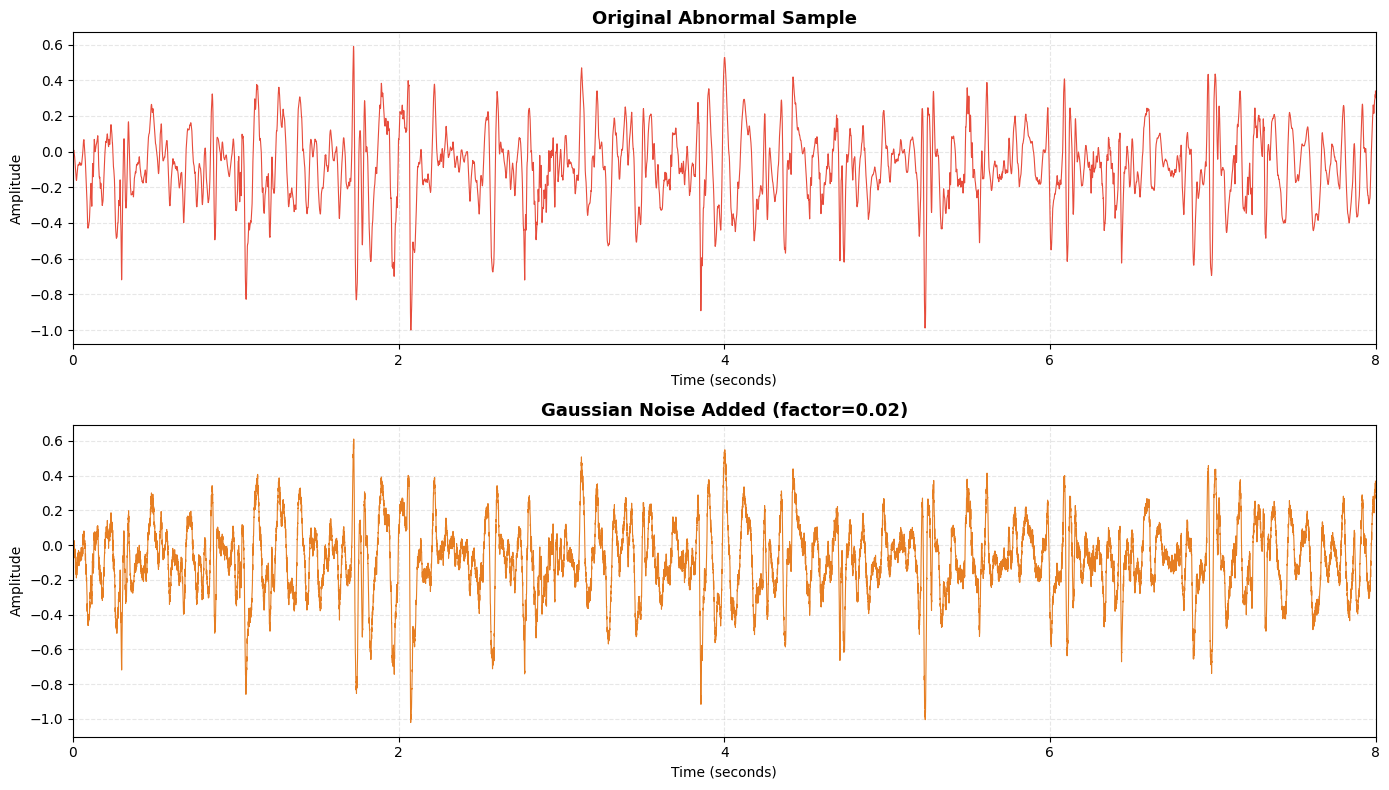


 Audio Statistics:

Original (b0008.wav):
  • Duration: 8.00 seconds
  • Sample Rate: 2000 Hz
  • Samples: 16000
  • Amplitude Range: [-1.0000, 0.5891]

With Gaussian Noise (factor=0.01):
  • Duration: 8.00 seconds
  • Sample Rate: 2000 Hz
  • Samples: 16000
  • Amplitude Range: [-1.0210, 0.6107]


In [16]:
print("=" * 70)
print("GAUSSIAN NOISE ADDITION")
print("=" * 70)

original = abnormal_audio

# add Gaussian noise
aug_noise = add_noise_audio(original, noise_factor=0.02)

# create time axes
time_original = np.arange(len(original)) / sr
time_noise = np.arange(len(aug_noise)) / sr

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Plot 1: Original
axes[0].plot(time_original, original, color='#e74c3c', linewidth=0.8)
axes[0].set_title('Original Abnormal Sample', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Time (seconds)', fontsize=10)
axes[0].set_ylabel('Amplitude', fontsize=10)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].set_xlim(0, 8)
axes[0].set_xticks([0, 2, 4, 6, 8])

# Plot 2: With Noise
axes[1].plot(time_noise, aug_noise, color='#e67e22', linewidth=0.8)
axes[1].set_title('Gaussian Noise Added (factor=0.02)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Time (seconds)', fontsize=10)
axes[1].set_ylabel('Amplitude', fontsize=10)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].set_xlim(0, 8)
axes[1].set_xticks([0, 2, 4, 6, 8])

plt.tight_layout()
plt.show()

# Print statistics
print(f"\n Audio Statistics:")

print(f"\nOriginal (b0008.wav):")
print(f"  • Duration: {len(original)/sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(original)}")
print(f"  • Amplitude Range: [{original.min():.4f}, {original.max():.4f}]")

print(f"\nWith Gaussian Noise (factor=0.01):")
print(f"  • Duration: {len(aug_noise)/sr:.2f} seconds")
print(f"  • Sample Rate: {sr} Hz")
print(f"  • Samples: {len(aug_noise)}")
print(f"  • Amplitude Range: [{aug_noise.min():.4f}, {aug_noise.max():.4f}]")



## Signal-to-Noise Ratio (SNR) Analysis

### Why SNR?

Visual inspection shows noise adds "fuzziness," but SNR quantifies the noise level.

### What is SNR?

**SNR = Ratio of signal power to noise power (in decibels)**

Formula: `SNR (dB) = 10 × log₁₀(Signal Power / Noise Power)`

Where:
  - Signal Power = Mean of squared original audio values
  - Noise Power = Mean of squared noise values (difference between noisy and original)
  - dB = Decibels (logarithmic scale)

### Expected Result

For **noise factor = 0.02**: SNR should be ~**20-25 dB**

This indicates appropriate augmentation - enough variation without destroying the heartbeat structure.

In [17]:


# calculate signal power
signal_power = np.mean(original ** 2)

# calculate noise (difference between noisy and original)
noise = aug_noise - original
noise_power = np.mean(noise ** 2)

# convert SNR to decibels
snr_db = 10 * np.log10(signal_power / noise_power)

print(f"\n Signal-to-Noise Ratio (SNR):")
print(f"  • Signal power: {signal_power:.6f}")
print(f"  • Noise power: {noise_power:.6f}")
print(f"  • SNR: {snr_db:.2f} dB")

print(f"\n SNR Interpretation:")
if snr_db > 25:
    print(f"  • Very clean signal - minimal noise added")
elif snr_db > 15:
    print(f"  • Good balance - noticeable noise but signal preserved ")
elif snr_db > 10:
    print(f"  • Moderate noise - signal still recognizable")
else:
    print(f"  • Heavy noise - signal may be degraded ")



 Signal-to-Noise Ratio (SNR):
  • Signal power: 0.050299
  • Noise power: 0.000404
  • SNR: 20.95 dB

 SNR Interpretation:
  • Good balance - noticeable noise but signal preserved 


For clearer visibility we can capture the first 2 seconds rather than all 8 seconds

ZOOMED COMPARISON: GAUSSIAN NOISE VISUALIZATION


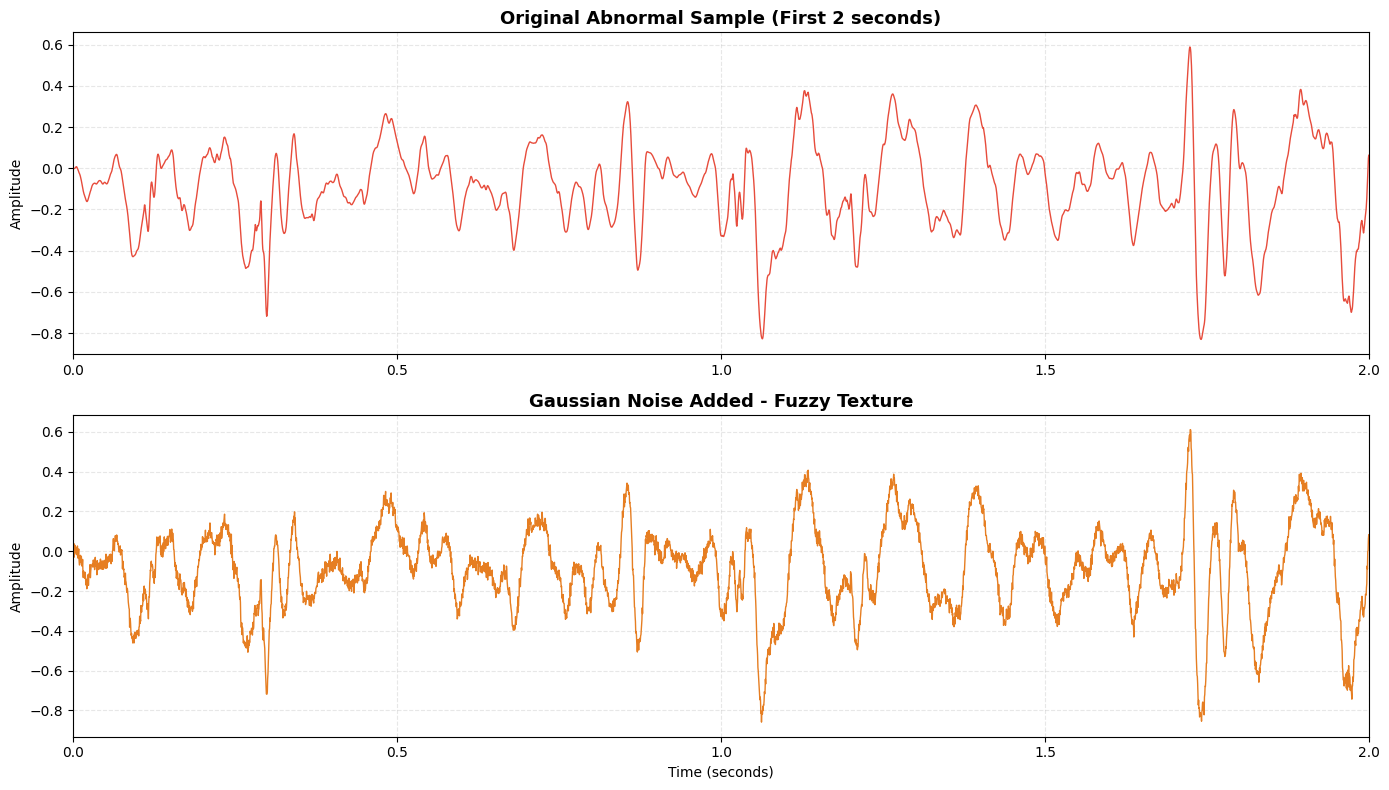


 Visual Observation:
  • Original: Relatively smooth waveform
  • With Noise: Added 'fuzziness' throughout
  • Heartbeat structure preserved, but with random variations


In [18]:

print("=" * 70)
print("ZOOMED COMPARISON: GAUSSIAN NOISE VISUALIZATION")
print("=" * 70)

# Use 2-second window for detailed view
zoom_duration = 2
zoom_samples = zoom_duration * sr

# extract zoomed portions
original_zoom = original[:zoom_samples]
noise_zoom = aug_noise[:zoom_samples]

# create time axis
time_zoom = np.arange(zoom_samples) / sr

fig, axes = plt.subplots(2, 1, figsize=(14, 8))

# Plot 1: Original
axes[0].plot(time_zoom, original_zoom, color='#e74c3c', linewidth=1.0)
axes[0].set_title('Original Abnormal Sample (First 2 seconds)', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Amplitude', fontsize=10)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].set_xlim(0, zoom_duration)
axes[0].set_xticks([0, 0.5, 1.0, 1.5, 2.0])

# Plot 2: With Noise
axes[1].plot(time_zoom, noise_zoom, color='#e67e22', linewidth=1.0)
axes[1].set_title('Gaussian Noise Added - Fuzzy Texture', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Time (seconds)', fontsize=10)
axes[1].set_ylabel('Amplitude', fontsize=10)
axes[1].grid(True, alpha=0.3, linestyle='--')
axes[1].set_xlim(0, zoom_duration)
axes[1].set_xticks([0, 0.5, 1.0, 1.5, 2.0])

plt.tight_layout()
plt.show()

print(f"\n Visual Observation:")
print(f"  • Original: Relatively smooth waveform")
print(f"  • With Noise: Added 'fuzziness' throughout")
print(f"  • Heartbeat structure preserved, but with random variations")


In [19]:
!pip install soundfile


In [20]:
import soundfile as sf
print(f"soundfile version: {sf.__version__}")

soundfile version: 0.13.1


Combining training sets B and E into one training set

In [21]:
import shutil

df_combined = pd.concat([df_b, df_e], ignore_index=True)

print(f"\n Dataset Summary:")
print(f"  • Training-B: {len(df_b)} files")
print(f"  • Training-E: {len(df_e)} files")
print(f"  • Combined Total: {len(df_combined)} files")
print(f"  • Normal: {(df_combined['label'] == -1).sum()}")
print(f"  • Abnormal: {(df_combined['label'] == 1).sum()}")

combined_dir = f'{DATA_FOLDER}/training-b-e-combined'
os.makedirs(combined_dir, exist_ok=True)


 Dataset Summary:
  • Training-B: 490 files
  • Training-E: 2141 files
  • Combined Total: 2631 files
  • Normal: 2344
  • Abnormal: 287


Copy all files from original to combined directory

In [22]:
print(f"\n Copying files to combined directory...")

copied_count = 0

print(f"Total files to copy: {len(df_combined)}")
print(f"Starting loop...")

for idx, row in df_combined.iterrows():
    filename = row['filename']

    # Determine source folder based on filename prefix
    if filename.startswith('b'):
        source_path = f'{DATA_FOLDER}/training-b/{filename}.wav'
    elif filename.startswith('e'):
        source_path = f'{DATA_FOLDER}/training-e/{filename}.wav'
    else:
        print(f" Warning: Unknown prefix for {filename}")
        continue

    # Destination path
    dest_path = f'{combined_dir}/{filename}.wav'

    # Copy file if file does not already exist
    if not os.path.exists(dest_path):
      shutil.copy2(source_path, dest_path)
      copied_count += 1
    else:
      continue

    # Progress indicator (every 500 files)
    if copied_count % 500 == 0:
        print(f"  Copied {copied_count}/{len(df_combined)} files...")

print(f" Copied {copied_count} files successfully")


 Copying files to combined directory...
Total files to copy: 2631
Starting loop...
 Copied 0 files successfully


Saving class labels to REFERENCE.CSV

In [23]:
print(f"\n Saving REFERENCE.csv...")
df_combined.to_csv(f'{combined_dir}/REFERENCE.csv', index=False, header=False)
print(f"REFERENCE.csv saved with {len(df_combined)} entries")
print(f"\nCombined Dataset Summary:")
print(f"  • Normal: {(df_combined['label'] == -1).sum()}")
print(f"  • Abnormal: {(df_combined['label'] == 1).sum()}")
print(f"  • Total: {len(df_combined)}")




 Saving REFERENCE.csv...
REFERENCE.csv saved with 2631 entries

Combined Dataset Summary:
  • Normal: 2344
  • Abnormal: 287
  • Total: 2631


Applying augmentations to abnormal samples

In [24]:
print(f"\nGenerating augmented versions of abnormal samples...")

augmented_dir = f'{DATA_FOLDER}/training-b-e-augmented'
os.makedirs(augmented_dir, exist_ok=True)

# Check if the augmented directory is empty
if os.path.exists(augmented_dir) and len(os.listdir(augmented_dir)) > 0:
    print(f"Augmented directory '{augmented_dir}' is not empty. Skipping augmentation.")
else:
    print(f"Augmented directory '{augmented_dir}' is empty or does not exist. Proceeding with augmentation.")

    # get all abnormal samples
    abnormal_samples = df_combined[df_combined['label'] == 1]
    print(f"  • Abnormal samples to augment: {len(abnormal_samples)}")

    augmented_count = 0

    for idx, row in abnormal_samples.iterrows():
        filename = row['filename']

        audio_path = f'{combined_dir}/{filename}.wav'
        audio, sr = librosa.load(audio_path, sr=2000)

        augmentations = [
            (time_stretch_audio(audio, rate=1.1), f"{filename}_time_fast"),
            (time_stretch_audio(audio, rate=0.9), f"{filename}_time_slow"),
            (pitch_stretch_audio(audio, sr, n_steps=2), f"{filename}_pitch_up"),
            (pitch_stretch_audio(audio, sr, n_steps=-2), f"{filename}_pitch_down"),
            (add_noise_audio(audio, noise_factor=0.02), f"{filename}_noisy")
        ]

        for aug_audio, aug_filename in augmentations:
          output_path = f'{augmented_dir}/{aug_filename}.wav'
          # write soundfile as a .wav file
          sf.write(output_path, aug_audio, sr)
          augmented_count += 1

        # print progress every 50 samples
        if ((abnormal_samples.index.get_loc(idx) + 1) % 50) == 0:
            print(f"  Processed {abnormal_samples.index.get_loc(idx) + 1}/{len(abnormal_samples)} abnormal samples ({augmented_count} files generated)...")

    print(f"Generated {augmented_count} augmented files")


Generating augmented versions of abnormal samples...
Augmented directory '/content/drive/MyDrive/CAD_PCG_Detection/CAD_PCG_Dataset/training-b-e-augmented' is not empty. Skipping augmentation.


Verify the number of augmented files

### Expected Output

`287 x 5 = 1435`

As there are 287 abnormal samples and 5 augmentation functions

In [25]:

augmented_dir = f'{DATA_FOLDER}/training-b-e-augmented'
if os.path.exists(augmented_dir):
    augmented_wav_files = [f for f in os.listdir(augmented_dir) if f.endswith('.wav')]
    print(f"Number of .wav files in '{augmented_dir}': {len(augmented_wav_files)}")
else:
    print(f"Directory not found: {augmented_dir}")

Number of .wav files in '/content/drive/MyDrive/CAD_PCG_Detection/CAD_PCG_Dataset/training-b-e-augmented': 1435


Standardise Class Labels for Binary Classification (Normal: 0, Abnormal: 1)

In [26]:
reference_path = f'{combined_dir}/REFERENCE.csv'
print(f"Loading REFERENCE.csv: {reference_path}")

try:
  df_combined = pd.read_csv(reference_path, header=None, names=['filename', 'label'])

  print("\nDataFrame head before updating labels:")
  print(df_combined.head())

  # Map the labels: -1 -> 0 (Normal), 1 remains 1 (Abnormal)
  df_combined['label'] = df_combined['label'].replace({-1: 0})

  print("\nDataFrame head with updated labels:")
  print(df_combined.head())

except FileNotFoundError:
    print(f"ERROR: File not found at {reference_path}")
    print("Please ensure the DATA_FOLDER variable is set correctly and the file exists.")
except Exception as e:
    print(f"An error occurred: {e}")


Loading REFERENCE.csv: /content/drive/MyDrive/CAD_PCG_Detection/CAD_PCG_Dataset/training-b-e-combined/REFERENCE.csv

DataFrame head before updating labels:
  filename  label
0    b0001     -1
1    b0002     -1
2    b0003     -1
3    b0004     -1
4    b0005     -1

DataFrame head with updated labels:
  filename  label
0    b0001      0
1    b0002      0
2    b0003      0
3    b0004      0
4    b0005      0


Splitting the dataset into train,val and test splits using stratified splits to ensure same class proportions

In [27]:
from sklearn.model_selection import train_test_split
if df_combined is not None:
  print("\nSplitting data into Training (80%) and Validation (20%) sets...")
  X = df_combined['filename']
  y = df_combined['label']

  # split the data using stratified split in order to ensures train/val splits have same class proportions as original y (important for imbalanced data)
  X_train, X_val, y_train, y_val = train_test_split(
      X,y,
      test_size=0.2,
      random_state=42,
      stratify=y
  )

  # Create DataFrames for the splits
  # .reset_index(drop=True): Creates a new clean index (0, 1, 2...) for the DataFrame, discarding the old index.
  df_train = pd.DataFrame({'filename': X_train, 'label': y_train}).reset_index(drop=True)
  df_val = pd.DataFrame({'filename': X_val, 'label': y_val}).reset_index(drop=True)
  print(f" Training set size: {len(df_train)}")
  print(f" Validation set size: {len(df_val)}")

  train_x = df_train['filename'].to_list()
  train_y = df_train['label'].to_list()
  val_x = df_val['filename'].to_list()
  val_y = df_val['label'].to_list()

  print("\nTrain Label Distribution (%):")
    # Verify stratification: Proportions should be similar to original (~89% / 11%)
  print(df_train['label'].value_counts(normalize=True) * 100)


  print("\nValidation Label Distribution (%):")
  # Verify stratification: Proportions should be similar to original (~89% / 11%)
  print(df_val['label'].value_counts(normalize=True) * 100)



Splitting data into Training (80%) and Validation (20%) sets...
 Training set size: 2104
 Validation set size: 527

Train Label Distribution (%):
label
0    89.068441
1    10.931559
Name: proportion, dtype: float64

Validation Label Distribution (%):
label
0    89.184061
1    10.815939
Name: proportion, dtype: float64


In [35]:
print(df_train.head())
print(df_val.head())

  filename  label
0   e01004      0
1   e00236      0
2    b0152      0
3   e01664      0
4    b0318      1
  filename  label
0   e01543      0
1   e00268      0
2   e01715      0
3   e02051      0
4   e00290      0


Defining pre-processing functions

In [29]:
from scipy.signal import butter, filtfilt
SAMPLE_RATE = 2000
TARGET_DURATION_SEC = 5
TARGET_LENGTH = SAMPLE_RATE * TARGET_DURATION_SEC

# Bandpass filter parameters
LOW_CUT = 25
HIGH_CUT = 400
FILTER_ORDER = 4

# Feature extraction parameters
# number of mel bins for spectrogram
N_MELS = 128
# window size for FFT
N_FFT = 2048
# hop length for STFT
HOP_LENGTH = 512
# number of MFCCs to compute
N_MFCC = 20

In [30]:
def butter_bandpass_filter(audio_data, LOW_CUT, HIGH_CUT, sr, order=FILTER_ORDER):
  try:
    # Nyquist frequenct is half of the sample rate
    nyquist = 0.5 * sr
    low = LOW_CUT / nyquist
    high = HIGH_CUT / nyquist

    # filter coefficients b - numerator, a - denominator
    b, a = butter(order, [low, high], btype='band')

    # apply filter
    y = filtfilt(b, a, audio_data)
    return y

  except Exception as e:
    print(f"Error during filtering: {e}")
    return audio_data

In [31]:
def preprocess_audio(file_path):
  try:
    audio, sr = librosa.load(file_path, sr=SAMPLE_RATE)

    if audio.size == 0:
      print(f"Warning: Audio file {file_path} is empty. Skipping...")
      return None

    filtered_audio = butter_bandpass_filter(audio, LOW_CUT, HIGH_CUT, sr)
    pad_audio = librosa.util.fix_length(filtered_audio, size=TARGET_LENGTH)
    normalised_audio = librosa.util.normalize(pad_audio)

    # verify length of audio
    assert normalised_audio.shape[0] == TARGET_LENGTH, f"Audio length error for {file_path}"
    # verify normalised audio
    assert np.max(np.abs(normalised_audio)) <= 1.0 + 1e-6, f"Audio normalization error for {file_path}"

    return normalised_audio

  except Exception as e:
    print(f"Error processing {file_path}: {e}")
    return None

Defining feature extraction functions
- Mel spectrogram for CNNs (2D features)
- 1D features vector for tree-based classifier (1D features)


In [32]:
def get_mel_spectrogram(audio):
  if audio is None:
    return None

  try:
    # generate Mel spectrogram
    S = librosa.feature.melspectrogram(y=audio, sr=SAMPLE_RATE, n_mels=N_MELS,
                                       n_fft=N_FFT, hop_length=HOP_LENGTH)

    # convert spectrogram from amplitude/power scale to decibels scale
    S_db = librosa.power_to_db(S, ref=np.max)
    return S_db

  except Exception as e:
        print(f"Error generating Mel spectrogram: {e}")
        return None



In [33]:
def get_1d_features(audio):
  if audio is None:
    return None

  try:
    # describes the timbre/quality of sound
    mfccs = librosa.feature.mfcc(y=audio, sr=SAMPLE_RATE, n_mfcc=N_MFCC)

    # counts how often the signal crosses zero; indicates how noisy the data is
    # librosa.features.zcr returns shape (1, T), so we are only interested in [0]
    zcr = librosa.feature.zero_crossing_rate(audio)[0]

    # as previously explored, indicates the "centre of mass" of the sound's frequencies
    # librosa.features.centroid returns shape (1, T), so we are only interested in [0]
    centroid = librosa.feature.spectral_centroid(y=audio, sr=SAMPLE_RATE)[0]

    features = []

    # Mean of each MFCC
    features.extend(np.mean(mfccs, axis=1))
    # Std dev of each MFCC
    features.extend(np.std(mfccs, axis=1))
    # Min of each MFCC
    features.extend(np.min(mfccs, axis=1))
    # Max of each MFCC
    features.extend(np.max(mfccs, axis=1))

    # repeat the same for zcr and centroid
    features.extend([np.mean(zcr), np.std(zcr), np.min(zcr), np.max(zcr)])
    features.extend([np.mean(centroid), np.std(centroid), np.min(centroid), np.max(centroid)])

    # convert list to NumPy array and return
    return np.array(features)

  except Exception as e:
    print(f"Error generating 1D features: {e}")
    return None

Test preprocessing and feature extraction pipeline on a normal and abnormal sample

### Expected Output

For both the Normal and Abnormal samples, the script should print the following:

* **Mel Spectrogram Shape:** `(128, 20)`
    * **`128` (Height):** This is determined by our `N_MELS = 128` constant.
    * **`20` (Width/Frames):** This is calculated from our audio length (`TARGET_LENGTH = 10000`) and step size (`HOP_LENGTH = 512`). The calculation is: `1 + (10000 // 512) = 1 + 19 = 20`.

* **1D Feature Vector Shape:** `(88,)`
    * This is the total number of statistical features. The calculation is:
    * **MFCCs:** `N_MFCC` (20) \* 4 stats (mean, std, min, max) = **80 features**
    * **ZCR:** 1 feature \* 4 stats = **4 features**
    * **Centroid:** 1 feature \* 4 stats = **4 features**
    * **Total:** `80 + 4 + 4 = 88` features.

In [34]:

if not df_train.empty:

  normal_sample = df_train[df_train['label'] == 0].iloc[0]
  normal_filename = normal_sample['filename']
  normal_file_path = f'{combined_dir}/{normal_filename}.wav'

  print(f"\n--- 1. TESTING on NORMAL Sample: {normal_filename} ---")
  processed__audio_normal = preprocess_audio(normal_file_path)

  if processed__audio_normal is not None:
    mel_spec_normal = get_mel_spectrogram(processed__audio_normal)
    features_1d_normal = get_1d_features(processed__audio_normal)

    if mel_spec_normal is not None:
      # inspecting the shape of the normal mel_spectrogram
      print(f"  • Mel spectrogram shape: {mel_spec_normal.shape}")
    if features_1d_normal is not None:
      # inspecting the shape of the normal 1d_features
      print(f"  • 1D features shape: {features_1d_normal.shape}")
  else:
    print("Pre-processing failed for the Normal sample.")


  abnormal_sample = df_train[df_train['label'] == 1].iloc[0]
  abnormal_filename = abnormal_sample['filename']
  abnormal_path = f'{combined_dir}/{abnormal_filename}.wav'

  print(f"\n--- 2. TESTING on ABNORMAL Sample: {abnormal_filename} ---")
  processed_audio_abnormal = preprocess_audio(abnormal_path)

  if processed_audio_abnormal is not None:
    mel_spec_abnormal = get_mel_spectrogram(processed_audio_abnormal)
    features_1d_abnormal = get_1d_features(processed_audio_abnormal)

    if mel_spec_abnormal is not None:
      # inspecting the shape of the abnormal mel_spectrogram
      print(f"  • Mel spectrogram shape: {mel_spec_abnormal.shape}")
      # inspecting the shape of the abnormal 1d_features
    if features_1d_abnormal is not None:
      print(f"  • 1D features shape: {features_1d_abnormal.shape}")
  else:
    print("Pre-processing failed for the Abnormal sample")




--- 1. TESTING on NORMAL Sample: e01004 ---
  • Mel spectrogram shape: (128, 20)
  • 1D features shape: (88,)

--- 2. TESTING on ABNORMAL Sample: b0318 ---
  • Mel spectrogram shape: (128, 20)
  • 1D features shape: (88,)
